# Taller 2

In [1]:
from pathlib import Path

import cv2 as cv
import matplotlib.pyplot as plt

import numpy as np

from skimage import exposure

##

## 1. Calibracion del histograma

In [2]:
img_1 = [
    Path("./img/1-hist-calibration/QUITO.png"),
]

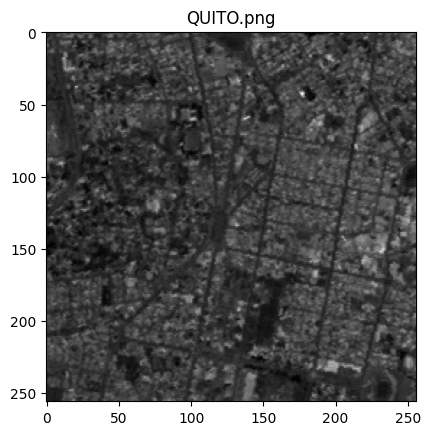

In [3]:
for path in img_1:
    img = cv.imread(path, cv.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap="gray")
    plt.title(path.name)
    plt.show()

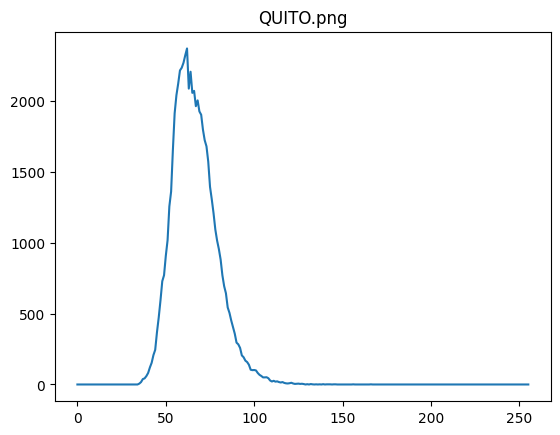

min 35, max 166


In [4]:
for path in img_1:
    hist = cv.calcHist([img], [0], None, [256], [0, 256])
    plt.plot(hist)
    plt.title(path.name)
    plt.show()

    print(f"min {np.min(img)}, max {np.max(img)}")

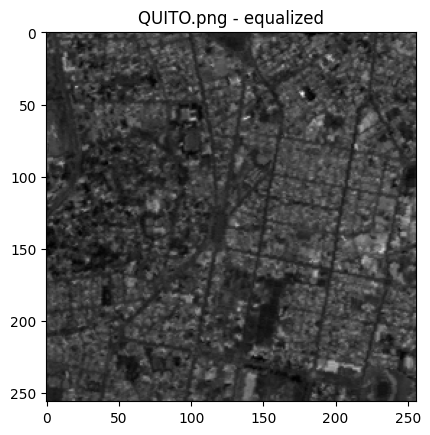

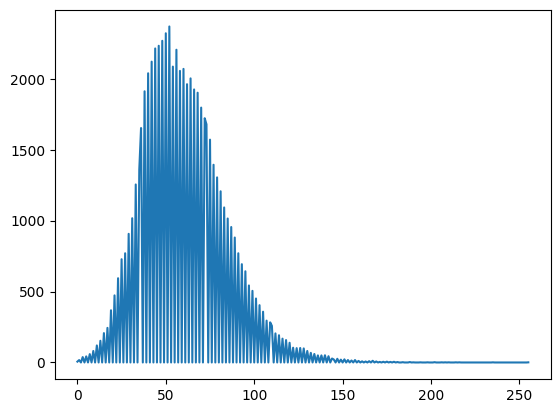

In [5]:
for path in img_1:
    img = cv.imread(path, cv.IMREAD_GRAYSCALE)

    rescaled_img = exposure.rescale_intensity(
        img, in_range=(35, 166), out_range=(0, 255)
    ).astype(np.uint8)

    plt.imshow(rescaled_img, cmap="gray")
    plt.title(f"{path.name} - equalized")
    plt.show()

    hist = cv.calcHist([rescaled_img], [0], None, [256], [0, 256])
    plt.plot(hist)
    plt.show()

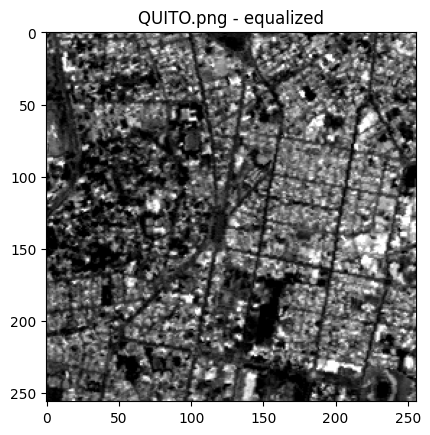

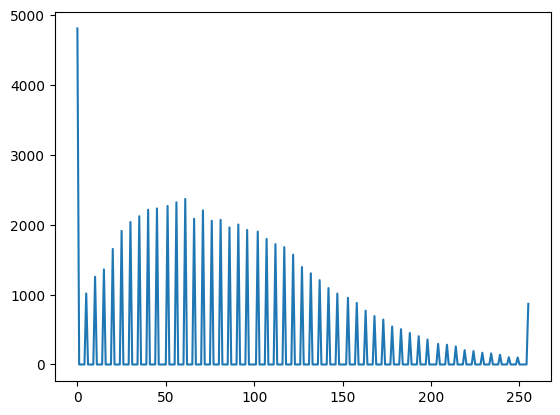

In [6]:
for path in img_1:
    img = cv.imread(path, cv.IMREAD_GRAYSCALE)

    rescaled_img = exposure.rescale_intensity(
        img, in_range=(50, 100), out_range=(0, 255)
    ).astype(np.uint8)

    plt.imshow(rescaled_img, cmap="gray")
    plt.title(f"{path.name} - equalized")
    plt.show()

    hist = cv.calcHist([rescaled_img], [0], None, [256], [0, 256])
    plt.plot(hist)
    plt.show()

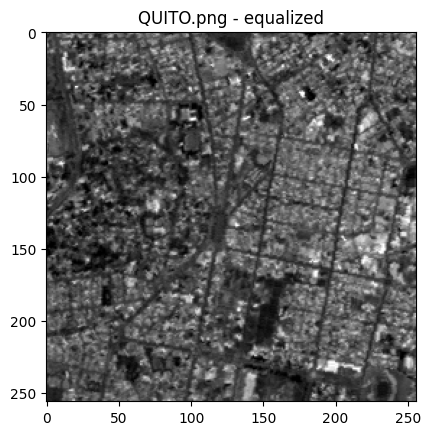

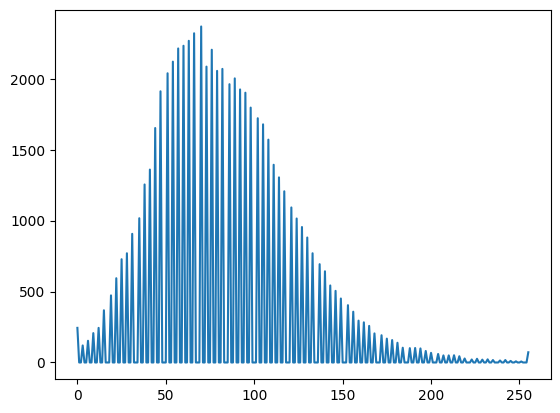

In [7]:
for path in img_1:
    img = cv.imread(path, cv.IMREAD_GRAYSCALE)

    rescaled_img = exposure.rescale_intensity(
        img, in_range=(40, 120), out_range=(0, 255)
    ).astype(np.uint8)

    plt.imshow(rescaled_img, cmap="gray")
    plt.title(f"{path.name} - equalized")
    plt.show()

    hist = cv.calcHist([rescaled_img], [0], None, [256], [0, 256])
    plt.plot(hist)
    plt.show()

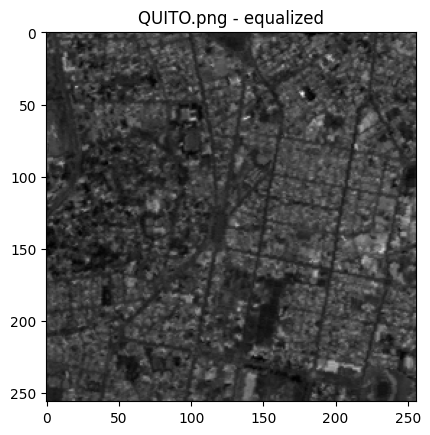

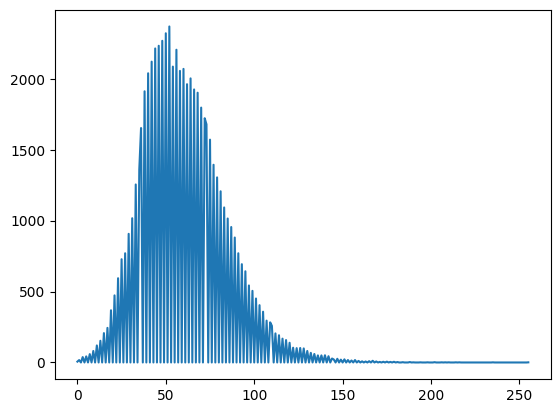

In [8]:
for path in img_1:
    img = cv.imread(path, cv.IMREAD_GRAYSCALE)

    rescaled_img = exposure.rescale_intensity(
        img, in_range=(35, 166), out_range=(0, 255)
    ).astype(np.uint8)

    plt.imshow(rescaled_img, cmap="gray")
    plt.title(f"{path.name} - equalized")
    plt.show()

    hist = cv.calcHist([rescaled_img], [0], None, [256], [0, 256])
    plt.plot(hist)
    plt.show()

La tranformacion que mas contraste genera es aquella de `50-100` en donde podemos apreciar mas diferenciacion entre los negros y blancos. Y la razon por que nuestra expansion de contraste de `35-166` es igual al punto 4 es porque el gris minimo y maximo concuerdan con ese mismo rango.

## 2. Ecualizacion del histograma

In [9]:
img_2 = [
    Path("./img/2-hist-equalization/BABOON.png"),
    Path("./img/2-hist-equalization/QUITO.png"),
]

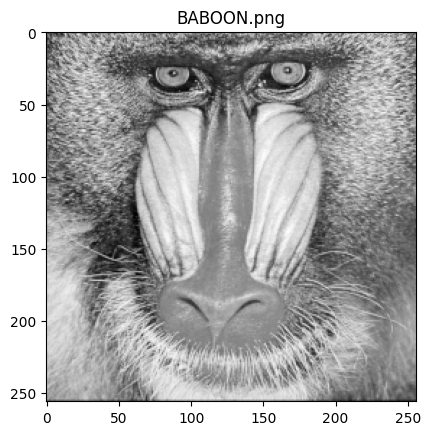

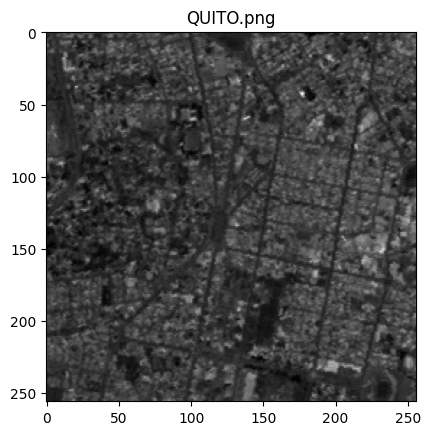

In [10]:
for path in img_2:
    img = cv.imread(path, cv.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap="gray")
    plt.title(path.name)
    plt.show()

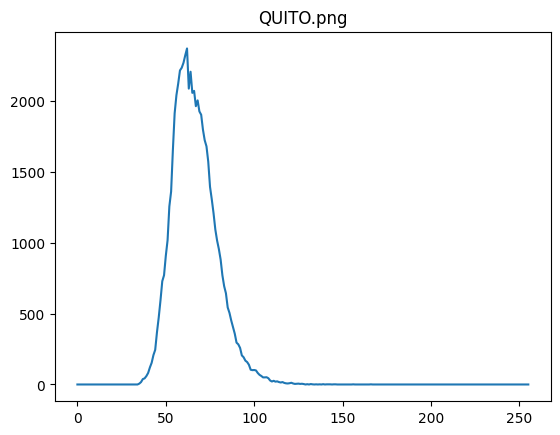

Colores únicos:  107


In [11]:
baboon_img = cv.imread(img_2[1], cv.IMREAD_GRAYSCALE)
hist = cv.calcHist([baboon_img], [0], None, [256], [0, 256])
plt.plot(hist)
plt.title(img_2[1].name)
plt.show()

print("Colores únicos: ", len(np.unique(baboon_img)))

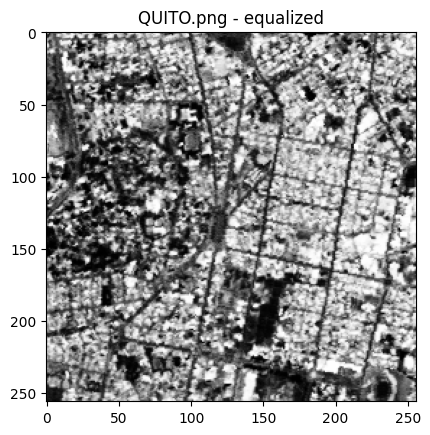

In [12]:
baboon_eq = cv.equalizeHist(baboon_img)
plt.imshow(baboon_eq, cmap="gray")
plt.title(f"{img_2[1].name} - equalized")
plt.show()

In [13]:
baboon_eq

array([[184, 235, 197, ..., 249, 238, 233],
       [124, 170,  39, ..., 252, 245, 202],
       [ 80,  39,  39, ..., 230, 220, 197],
       ...,
       [ 39,  23,  19, ..., 155, 140, 132],
       [ 23,  28,  33, ..., 177, 148, 177],
       [ 19,  15,  19, ..., 177, 177, 184]], shape=(256, 256), dtype=uint8)

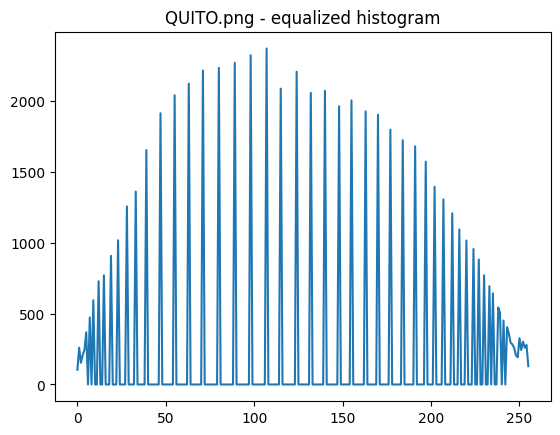

Colores únicos:  61


In [14]:
hist = cv.calcHist([baboon_eq], [0], None, [256], [0, 256])
plt.plot(hist)
plt.title(f"{img_2[1].name} - equalized histogram")
plt.show()

print("Colores únicos: ", len(np.unique(baboon_eq)))

Si bien observamos que el contraste en la imágen ha incrementado, pues ahora usamos un rango más amplio de grises, notamos una disminución en la cantidad de colores disponibles. Esto se debe a que al realizar una operación al histograma de una imágen, nunca obtendremos una mayor variedad de colores. Teniendo esto en cuenta, las discontinuidades en el histograma se deben a que después del mapeo, tenemos una variedad de colores menor a la del conjunto inicial. Los saltos son notables porque distribuímos uniformemente estos colores por todo el rango.

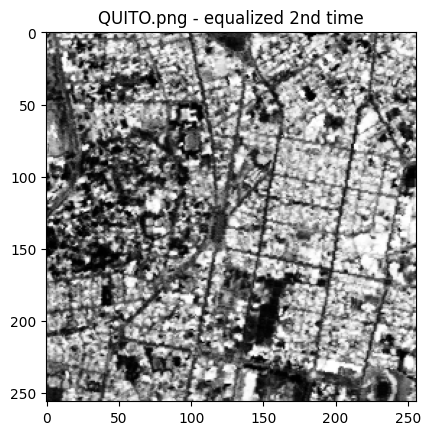

In [15]:
baboon_eq_two = exposure.equalize_hist(baboon_eq)
plt.imshow(baboon_eq_two, cmap="gray")
plt.title(f"{img_2[1].name} - equalized 2nd time")
plt.show()

In [16]:
baboon_eq_two.min(), baboon_eq_two.max()

(np.float64(0.0015869140625), np.float64(1.0))

In [17]:
baboon_eq_two = (baboon_eq_two * 255).astype(np.uint8)

No logramos entender por qué el rango de grises cambia de [0,255] en la primera ecualización a [0,1] en la segunda. En todo caso, al comparar las imágenes, notamos que no hay cambio entre ellas. Al realizar una doble ecualización, no ocurre nada. Ecualizar una imágen ecualizada devuelve la misma imágen.

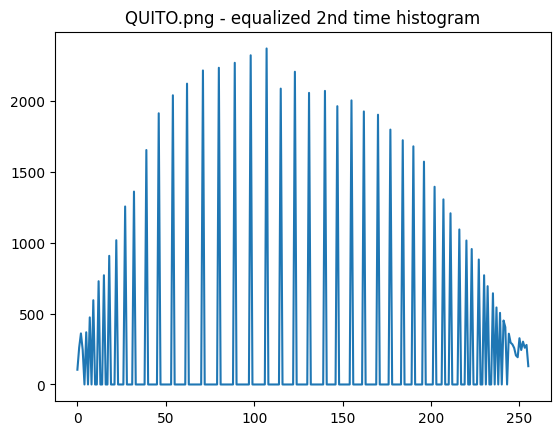

Colores únicos:  60


In [18]:
hist = cv.calcHist([baboon_eq_two], [0], None, [256], [0, 256])
plt.plot(hist)
plt.title(f"{img_2[1].name} - equalized 2nd time histogram")
plt.show()

print("Colores únicos: ", len(np.unique(baboon_eq_two)))

Lo anterior se ve reforzado al ver el histograma. Esto ocurre porque ecualizar implica tomar una imágen con un rango reducido de colores e incrementarlo para usar el rango completo. Cuando ecualizamos por primera vez, pasamos a usar el rango completo de colores. Ecualizar nuevamente no incrementa el rango, por lo que no pasa nada.

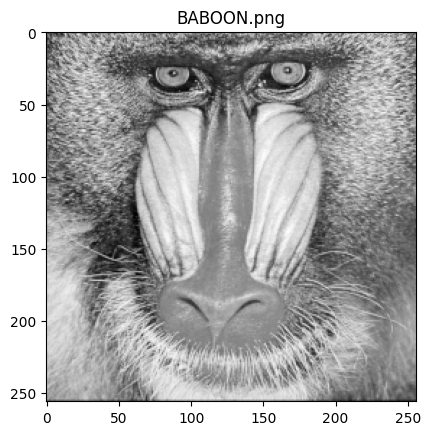

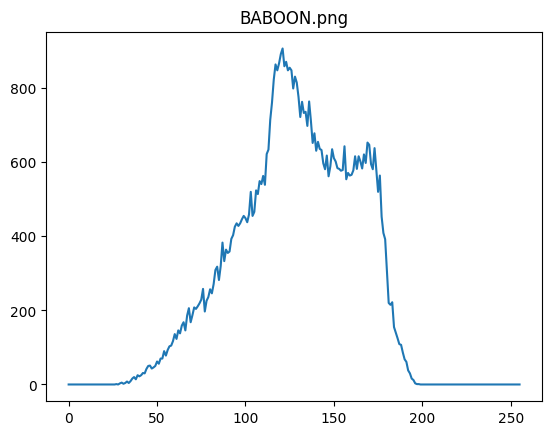

Colores únicos:  171


In [19]:
quito_img = cv.imread(img_2[0], cv.IMREAD_GRAYSCALE)
plt.imshow(quito_img, cmap="gray")
plt.title(img_2[0].name)
plt.show()

hist = cv.calcHist([quito_img], [0], None, [256], [0, 256])
plt.plot(hist)
plt.title(img_2[0].name)
plt.show()

print("Colores únicos: ", len(np.unique(quito_img)))

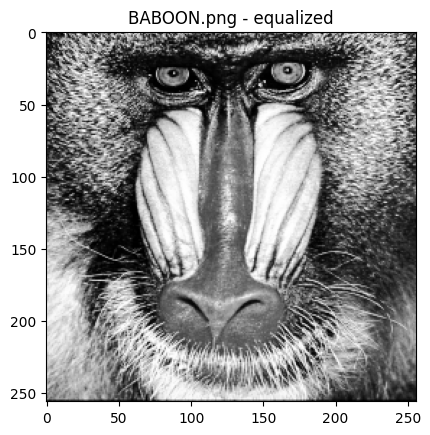

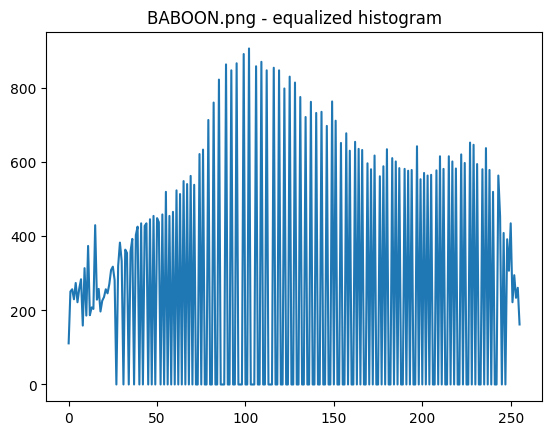

Colores únicos:  128


In [20]:
quito_eq = cv.equalizeHist(quito_img)
plt.imshow(quito_eq, cmap="gray")
plt.title(f"{img_2[0].name} - equalized")
plt.show()

hist_eq = cv.calcHist([quito_eq], [0], None, [256], [0, 256])
plt.plot(hist_eq)
plt.title(f"{img_2[0].name} - equalized histogram")
plt.show()

print("Colores únicos: ", len(np.unique(quito_eq)))

El cambio al ecualizar esta imágen no es tan notable como el cambio al ecualizar la imágen de Quito. Esto se debe a que tanto el rango como la cantidad de colores de la nueva imágen es mayor. 

## 3. Comparacion histograma

In [21]:
img_3 = [Path("./img/3-hist-comparison/BOUGIES.png")]

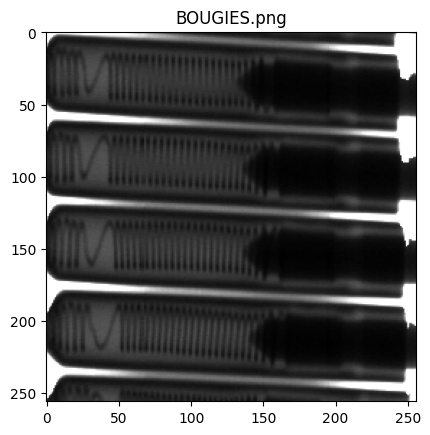

min 10, max 255


In [22]:
for path in img_3:
    img = cv.imread(path, cv.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap="gray")
    plt.title(path.name)
    plt.show()

    print(f"min {np.min(img)}, max {np.max(img)}")

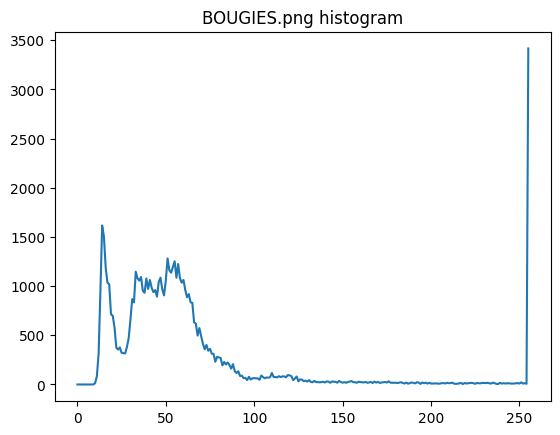

In [23]:
for path in img_3:
    img = cv.imread(path, cv.IMREAD_GRAYSCALE)
    hist = cv.calcHist([img], [0], None, [256], [0, 256])
    plt.plot(hist)
    plt.title(f"{path.name} histogram")
    plt.show()

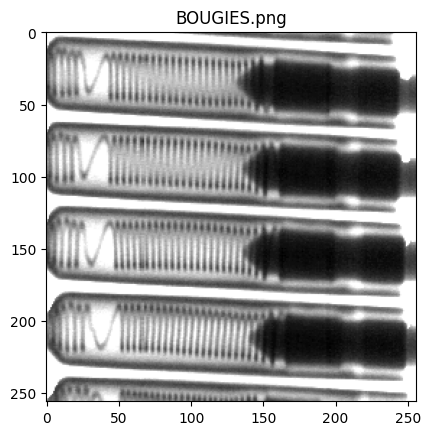

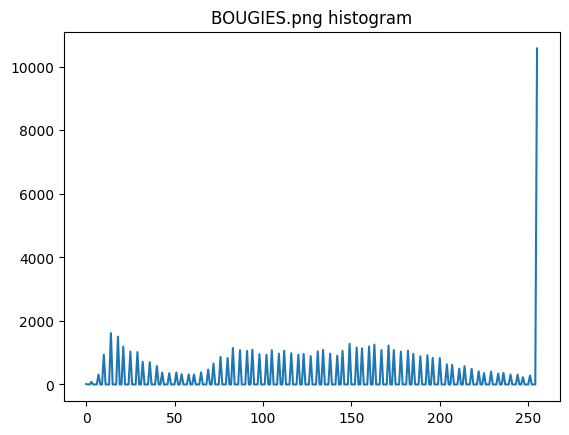

In [24]:
for path in img_3:
    img = cv.imread(path, cv.IMREAD_GRAYSCALE)

    img = exposure.rescale_intensity(
        img, in_range=(10, 80), out_range=(0, 255)
    ).astype(np.uint8)

    plt.imshow(img, cmap="gray")
    plt.title(path.name)
    plt.show()

    hist = cv.calcHist([img], [0], None, [256], [0, 256])
    plt.plot(hist)
    plt.title(f"{path.name} histogram")
    plt.show()

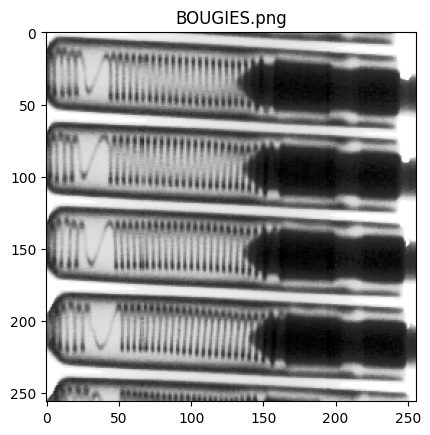

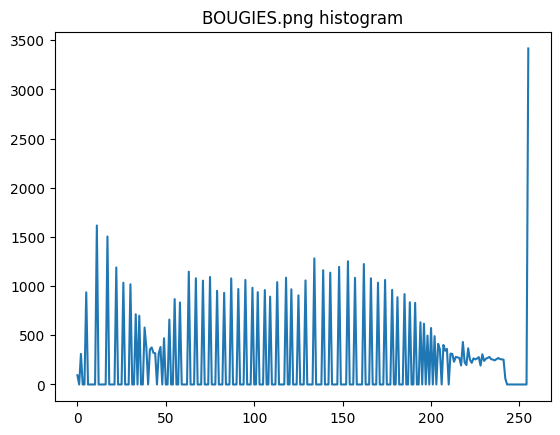

In [25]:
for path in img_3:
    img = cv.imread(path, cv.IMREAD_GRAYSCALE)

    img = cv.equalizeHist(img)

    plt.imshow(img, cmap="gray")
    plt.title(path.name)
    plt.show()

    hist = cv.calcHist([img], [0], None, [256], [0, 256])
    plt.plot(hist)
    plt.title(f"{path.name} histogram")
    plt.show()

## 4. Umbralizacion simple

In [26]:
img_4 = [Path("./img/4-threshold-simple/MUSCLE.png")]

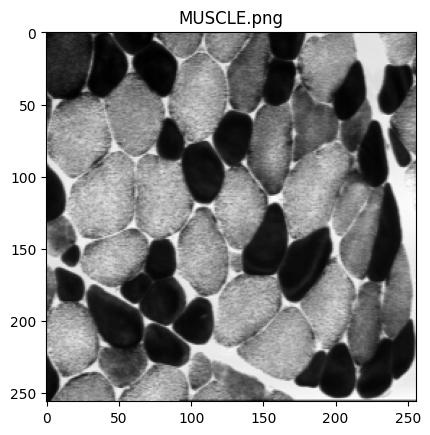

In [27]:
for path in img_4:
    img = cv.imread(path, cv.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap="gray")
    plt.title(path.name)
    plt.show()

Text(0.5, 1.0, 'MUSCLE.png')

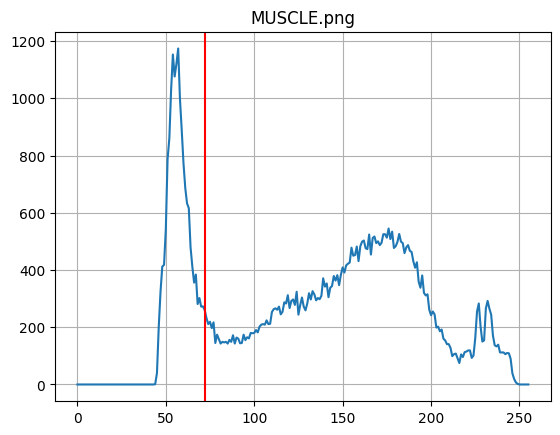

In [28]:
muscle_img = cv.imread(img_4[0], cv.IMREAD_GRAYSCALE)
max_x = 72

hist = cv.calcHist([muscle_img], [0], None, [256], [0, 256])
plt.plot(hist)
plt.grid()
plt.axvline(x=max_x, color="r")
plt.title(img_4[0].name)

Puede ser buena idea tomar $S=72$ porque, como podemos ver en el histoograma anterior, en esta posición se acaba el pico de grises oscuros, representativos de las fibras oscuras en la imágen.

In [29]:
muscle_expanded_hist = exposure.rescale_intensity(
    muscle_img, in_range=(max_x, max_x+1), out_range=(0, 255)
).astype(np.uint8)

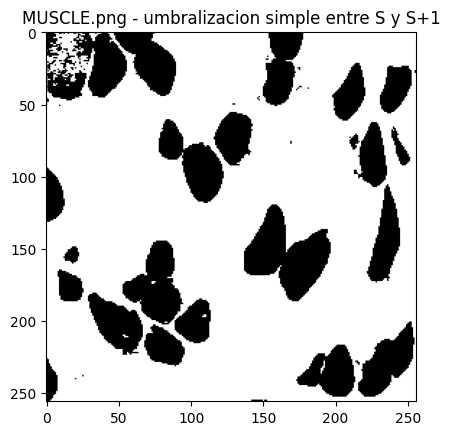

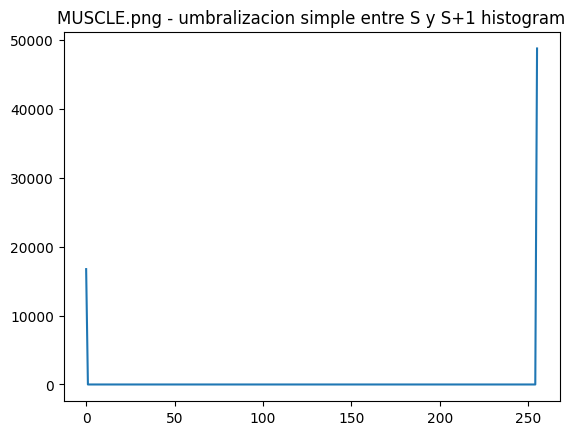

In [30]:
plt.imshow(muscle_expanded_hist, cmap="gray")
plt.title(f"{img_4[0].name} - umbralizacion simple entre S y S+1")
plt.show()

hist = cv.calcHist([muscle_expanded_hist], [0], None, [256], [0, 256])
plt.plot(hist)
plt.title(f"{img_4[0].name} - umbralizacion simple entre S y S+1 histogram")
plt.show()

Logramos separar las fibras oscuras del resto de la imágen. La imágen resultante es binaria. Sus pixeles toman valores $0$ si están dentro de nuestro umbral, y $255$ de lo contrario. La calidad de la separación depende de nuestra selección de $S$. Con nuestra selección, nos aseguramos de no incluir otras fibras, pero hay vacíos en algunas de las fibras seleccionadas.

-----

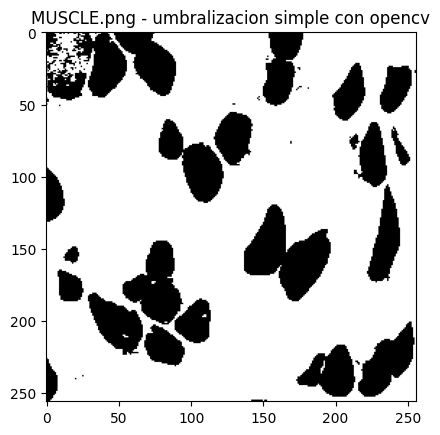

In [31]:
# umbralizacion con opencv
_, muscle_threshold = cv.threshold(muscle_img, max_x, 255, cv.THRESH_BINARY)
plt.imshow(muscle_threshold, cmap="gray")
plt.title(f"{img_4[0].name} - umbralizacion simple con opencv")
plt.show()

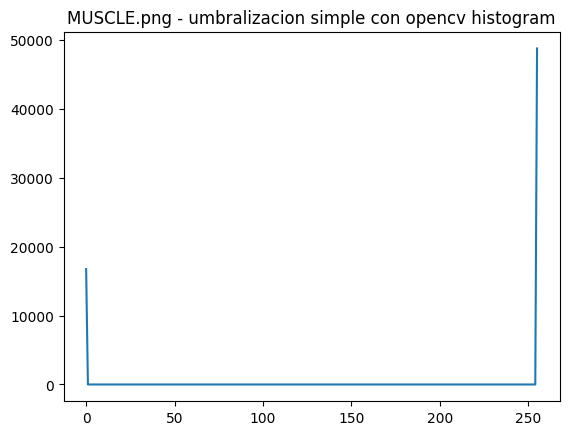

In [32]:
hist = cv.calcHist([muscle_threshold], [0], None, [256], [0, 256])
plt.plot(hist)
plt.title(f"{img_4[0].name} - umbralizacion simple con opencv histogram")
plt.show()


Obtenemos el mismo resultado que al realizar la expansión del histograma que entre $S$ y $S+1$! Esto nos dice que la función ```cv.threshold``` con `cv.THRESH_BINARY` funciona exactamente de esa manera.

-----

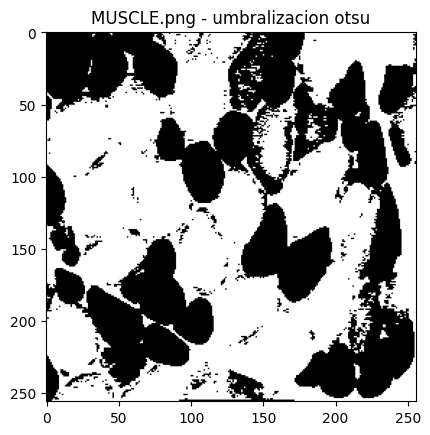

In [33]:
_, muscle_otsu = cv.threshold(muscle_img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
plt.imshow(muscle_otsu, cmap="gray")
plt.title(f"{img_4[0].name} - umbralizacion otsu")
plt.show()

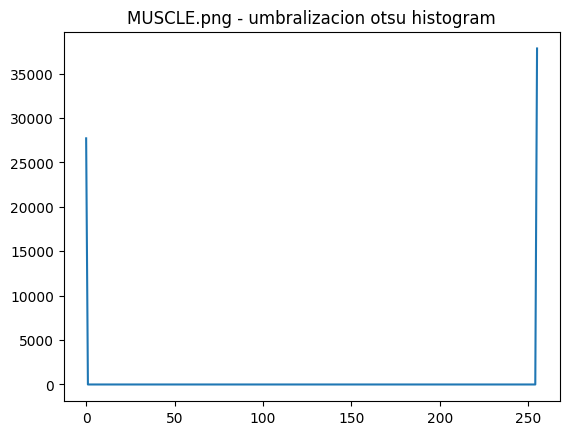

In [34]:
hist = cv.calcHist([muscle_otsu], [0], None, [256], [0, 256])
plt.plot(hist)
plt.title(f"{img_4[0].name} - umbralizacion otsu histogram")
plt.show()

Esta umbralización es mucho mejor para tomar las fibras oscuras completas, sin embargo, también toma parte de las fibras un poco más claras. En el histograma vemos esto reflejado en que ahora los dos picos tienen tamaños más cercanos.

En todo caso, resulta interesante que aquí no tuvimos que ponernos a escoger un umbral a ojo, sino que fue escogido automáticamente.

La binarización ostu presupone un histograma bimodal en nuestra imágen (que tiene sentido teniendo en cuenta que el resuultado de una umbralización es una imágen binaria). Otsu intenta encontrar dos gausianas (clases) tales que los pixeles que están dentro de tal clase minimizan la varianza total de la clase. Para lograrlo, itera sobre todo los umbrales posibles. Se queda con el umbral que logra tal minimización.

## 5. Umbralizacion doble

In [35]:
img_5 = [
    Path("./img/5-threshold-double/ANGIO.png"),
    Path("./img/5-threshold-double/RONDELLE.png"),
]

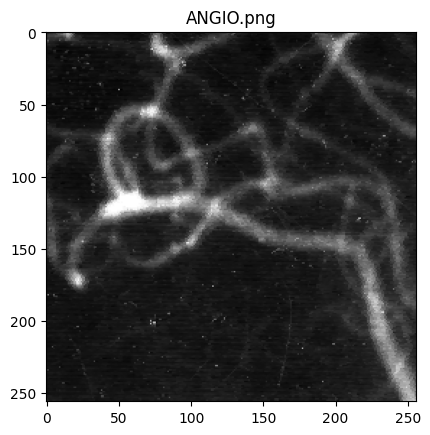

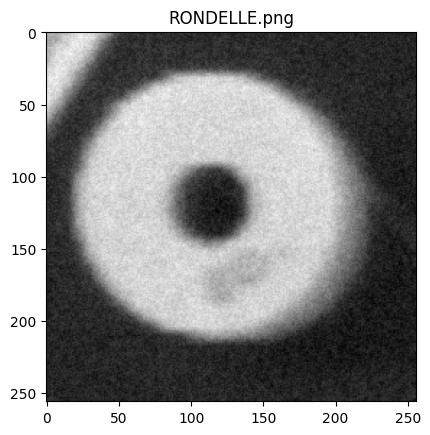

In [36]:
for path in img_5:
    img = cv.imread(path, cv.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap="gray")
    plt.title(path.name)
    plt.show()

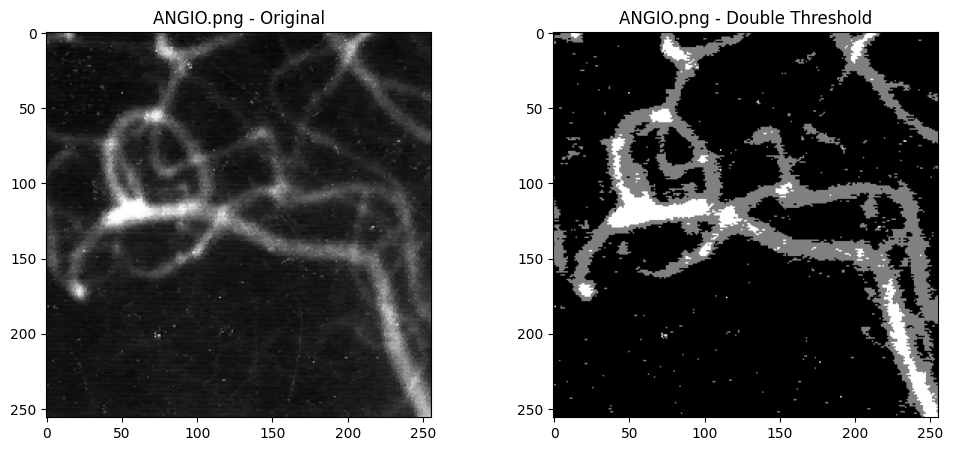

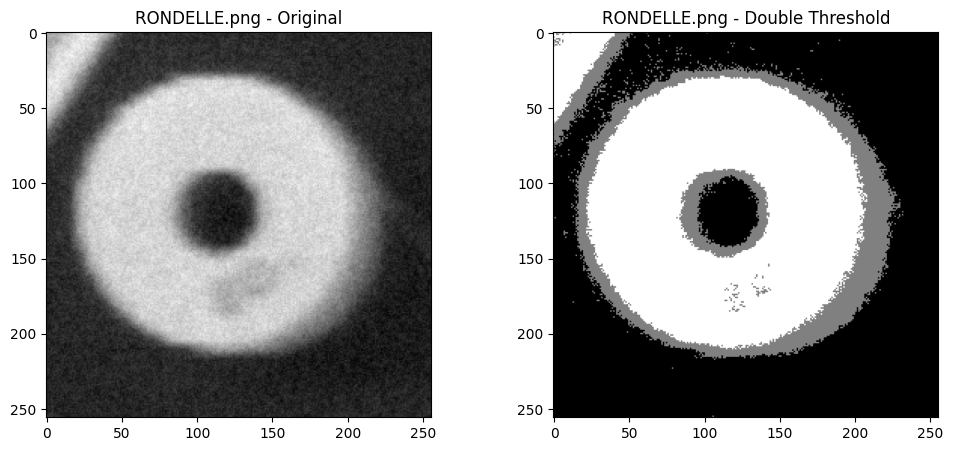

In [37]:
lower_threshold = 70
upper_threshold = 140

for path in img_5:
    img = cv.imread(path, cv.IMREAD_GRAYSCALE)

    result = np.zeros_like(img)

    result[img < lower_threshold] = 0
    result[(img >= lower_threshold) & (img < upper_threshold)] = 128
    result[img >= upper_threshold] = 255

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap="gray")
    plt.title(f"{path.name} - Original")

    plt.subplot(1, 2, 2)
    plt.imshow(result, cmap="gray")
    plt.title(f"{path.name} - Double Threshold")

    plt.show()

## 6. Ejercicio Síntesis

### Ejercicio 1

In [38]:
img_6 = [Path("./img/6-final/BOUGIES.png"),
         Path("./img/6-final/MUSCLE.png")]

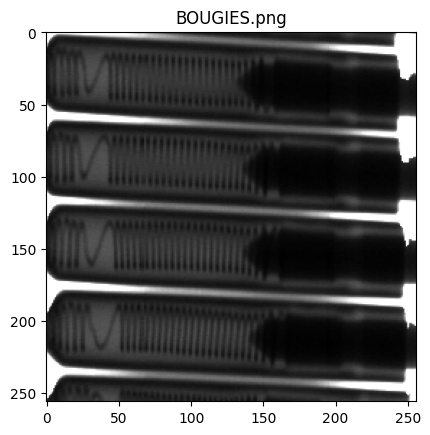

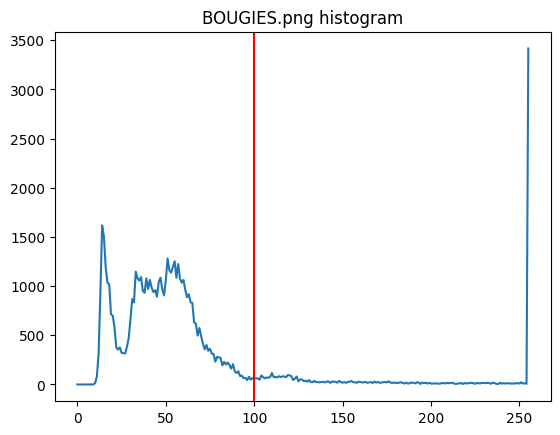

In [39]:
bougies_img = cv.imread(img_6[0], cv.IMREAD_GRAYSCALE)
plt.imshow(bougies_img, cmap="gray")
plt.title(img_6[0].name)
plt.show()

hist = cv.calcHist([bougies_img], [0], None, [256], [0, 256])
max_x = 100
plt.plot(hist)
plt.axvline(x=max_x, color="r")
plt.title(f"{img_6[0].name} histogram")
plt.show()

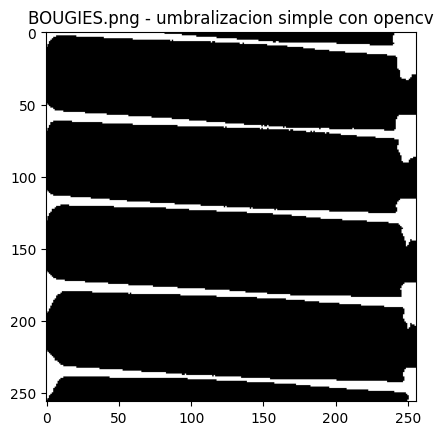

In [40]:
_, bougies_threshold = cv.threshold(bougies_img, max_x, 255, cv.THRESH_BINARY)
plt.imshow(bougies_threshold, cmap="gray")
plt.title(f"{img_6[0].name} - umbralizacion simple con opencv")
plt.show()

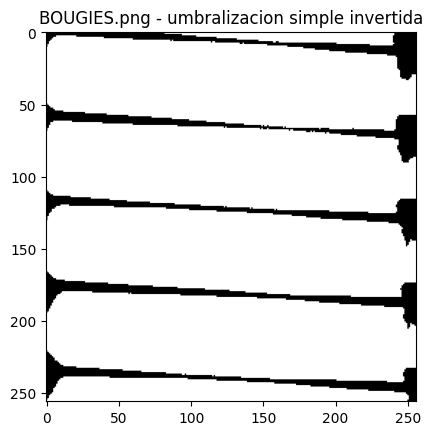

In [41]:
bougies_inverted_threshold = cv.bitwise_not(bougies_threshold)
plt.imshow(bougies_inverted_threshold, cmap="gray")
plt.title(f"{img_6[0].name} - umbralizacion simple invertida")
plt.show()

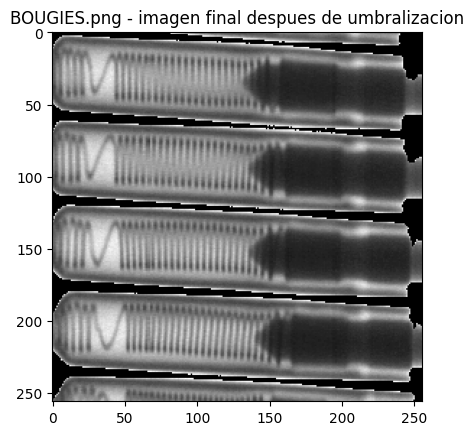

In [42]:
bougies_final = cv.bitwise_and(bougies_img, bougies_inverted_threshold)
plt.imshow(bougies_final, cmap="gray")
plt.title(f"{img_6[0].name} - imagen final despues de umbralizacion")
plt.show()

Para lograr el resultado anterior, solo tuvimos que:
- Realizar una umbralización simple que separara la parte externa de la interna de las bujías. Teniendo en cuenta que la parte externa de las bujías usa los grises más claros, y con ayuda del histograma, escoojimos $S=100$. Esto nos da como resultado una imágen binaria.
- Invertimos con un $NOT$ la imágen binaria. De esta manera, podremos usarla como filtro.
- Realizamos una operación $AND$ entre la imágen original y el filtro. Como en una $AND$ la imágen se queda con los pixeles más oscuros disponibles en ambas imágenes, obtenemos el resultado deseado.

-----

### Ejercicio 2

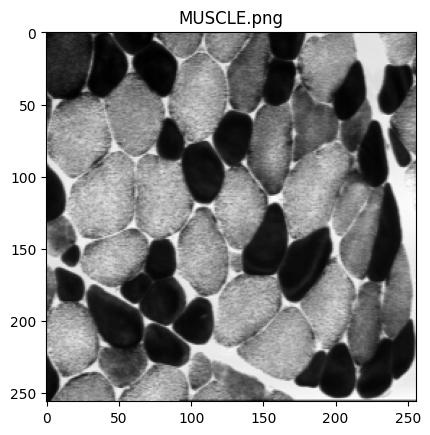

In [43]:
muscle_img = cv.imread(img_6[1], cv.IMREAD_GRAYSCALE)
plt.imshow(muscle_img, cmap="gray")
plt.title(img_6[1].name)
plt.show()

Text(0.5, 1.0, 'MUSCLE.png')

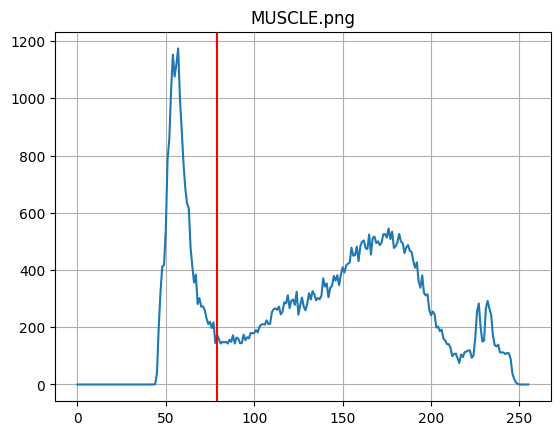

In [44]:
max_x = 79
hist = cv.calcHist([muscle_img], [0], None, [256], [0, 256])
plt.plot(hist)
plt.grid()
plt.axvline(x=max_x, color="r")
plt.title(img_6[1].name)

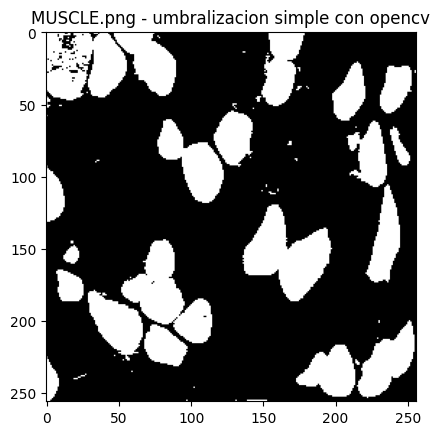

In [45]:
_, muscle_threshold = cv.threshold(muscle_img, max_x, 255, cv.THRESH_BINARY)
muscle_threshold = cv.bitwise_not(muscle_threshold)
plt.imshow(muscle_threshold, cmap="gray")
plt.title(f"{img_6[1].name} - umbralizacion simple con opencv")
plt.show()

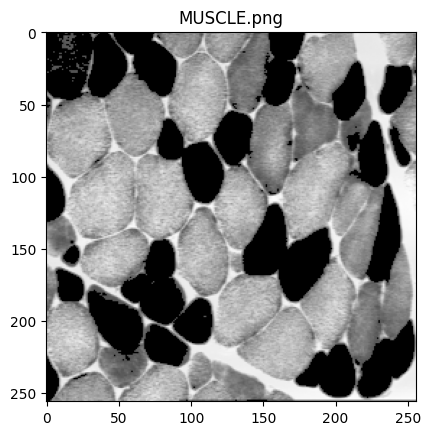

In [46]:
muscle_final = cv.bitwise_and(muscle_img, cv.bitwise_not(muscle_threshold))
plt.imshow(muscle_final, cmap="gray")
plt.title(f"{img_6[1].name}")
plt.show()

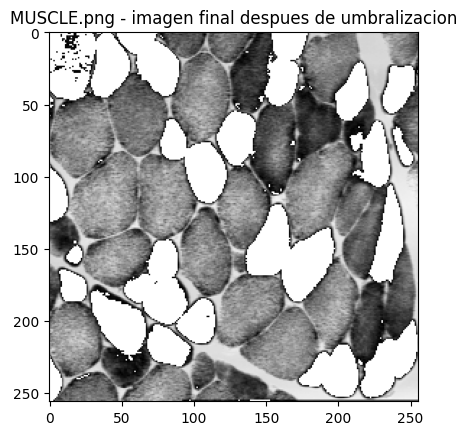

In [47]:
muscle_final = np.where(muscle_final == 0, 255, muscle_final)
plt.imshow(muscle_final, cmap="gray")
plt.title(f"{img_6[1].name} - imagen final despues de umbralizacion")
plt.show()

En esta ocación, seguimos un proceso muy parecido al del ejercicio 1, pero le tuvimos que agregar un paso final:
- Por pixel, si su valor era 0, lo mandabamos a 255. De lo contrario, se dejaba el valor original.